In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import os

from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Pandas: 1.2.4
Matplotlib: 3.4.1


In [3]:
state_art_df = pd.read_csv(os.path.join('csv', 'state_art.csv'))

In [4]:
state_art_df.head(5)

,Study,Year,Dataset,Audio Features,ML Model,Evaluation Method
0,[23],2020,Mivia Dataset [8],"STFT, MFCC, Mel-Scale","DenseNet-121, MobileNetV2, ResNet-50","RR, MDR, ER, FPR, Accuracy"
1,[24],2020,"ToyADMOS [11],MIMII [12]",Mel-Filterbank,"SPIDERnet, AE, Naive MSE, PROTOnet","AUC, ROC, TPR, FPR, F-measure"
2,[25],2020,Mivia Dataset [8],"Audio Power, Audio harmonicity, Total loudness...","one-class SVM, DNN","Accuracy, F1-score, Precision"
3,[26],2020,Own Dataset,"MFCC, Mel filterbank energies",LSTM,"Accuracy, F1-score"
4,[27],2020,"Own Dataset, Freesound [12]","MFCC, DWT, ZCR, SR, GFCC","SVM, Random Forest, CNN, KNN Gradient Boosting","Precision, Recall, F1-score, Accuracy, p-value"


In [5]:
columns = ['Dataset', 'Audio Features', 'ML Model', 'Evaluation Method']

for col in columns:
    print(f"{col}\n-----")
    print(
        state_art_df[col]
        .str.replace(r'( \[\d{1,2}\]|and|,$)', '')
        .str.split(",", expand=True)
        .melt()['value']
        .str.upper()
        .str.strip()
        .value_counts()
        .head(5)
    )
    print("----\n")

Dataset
-----
OWN DATASET      10
MIMII             8
TOYADMOS          8
MIVIA DATASET     4
TUT DATASET       4
Name: value, dtype: int64
----

Audio Features
-----
MFCC                10
LOG-MEL ENERGIES     7
MEL-SPECTROGRAM      5
ZCR                  4
DWT                  3
Name: value, dtype: int64
----

ML Model
-----
AE               7
ONE-CLASS SVM    5
CNN              4
CAE              4
WAVENET          3
Name: value, dtype: int64
----

Evaluation Method
-----
AUC         14
F1-SCORE    12
ROC          6
ACCURACY     6
PAUC         6
Name: value, dtype: int64
----



In [6]:
word_cloud_lst = []

for col in columns:
  values = (
      state_art_df[col]
      .str.replace(r'( \[\d{1,2}\]|and|,$)', '')
      .str.split(",", expand=True)
      .melt()['value']
      .str.upper()
      .str.strip()
      .dropna()
      .to_list()
      )
      
  ct = Counter(values)
  wordcloud = WordCloud().generate_from_frequencies(ct)
  word_cloud_lst.append(wordcloud)

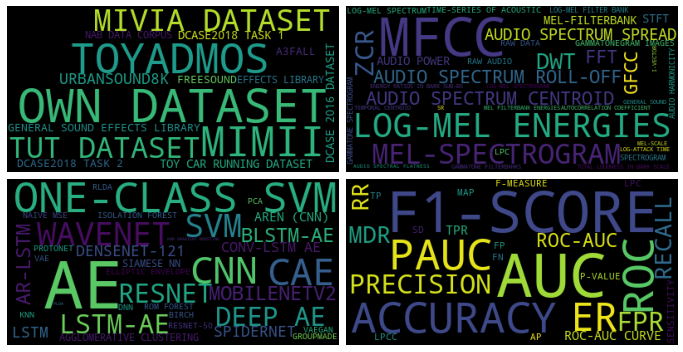

In [7]:
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(
    fig,
    111,  # similar to subplot(111)
    nrows_ncols=(2, 2),  # creates 2x2 grid of axes
    axes_pad=0.1,  # pad between axes in inch.
)

for ax, im in zip(grid, word_cloud_lst):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")

plt.show()